In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
def pre_process_for_model_1(df):
    columns = ['Location', 'Years of Experience Required', 'Skills', 'JobTitle_New', 'Salary_New_Processed']
    print('Columsn used - ', columns)
    df = df[columns]
    df = df.dropna()
    
    skills = df['Skills'].str.split(',\s*', expand=True).stack()
    skills = pd.get_dummies(skills, prefix='Skill')
    skills = skills.groupby(level=0).sum()
    df = pd.concat([df, skills], axis=1)
    df.drop('Skills', axis=1, inplace=True)
    
    df = pd.get_dummies(df, columns=['Location', 'JobTitle_New'], drop_first=True)
    return df

In [3]:
def pre_process_for_model_2(df):
    columns = ['Type', 'Location', 'Years of Experience Required', 'Skills', 'JobTitle_New', 'Salary_New_Processed']
    print('Columsn used - ', columns)
    df = df[columns]
    df = df.dropna()
    
    skills = df['Skills'].str.split(',\s*', expand=True).stack()
    skills = pd.get_dummies(skills, prefix='Skill')
    skills = skills.groupby(level=0).sum()
    df = pd.concat([df, skills], axis=1)
    df.drop('Skills', axis=1, inplace=True)
    
    df = pd.get_dummies(df, columns=['Type', 'Location', 'JobTitle_New'], drop_first=True)
    return df

In [4]:
def avergae_diff_percentage(Y_actual, Y_pred):
    diff_perecentage = np.abs((Y_actual - Y_pred)/Y_actual)*100
    mean_diff_perecentage = np.mean(diff_perecentage)
    return np.sqrt(mean_diff_perecentage)

In [5]:
def regression(df):
    print(f'Rows in final data for model {len(df)}\n')
    X = df.drop('Salary_New_Processed', axis=1)
    Y = df['Salary_New_Processed']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    print(f'Regression model Mean Squared Error: {mean_squared_error(Y_test, Y_pred, squared=False):.2f}')
    print(f'Regression model R-squared Score: {r2_score(Y_test, Y_pred):.2f}')
    print(f'Regression model Difference to actual percentage: {avergae_diff_percentage(Y_test, Y_pred):.2f}')
    
    row_number = 10
    sample_data = X_test.iloc[row_number].to_frame().T
    sample_prediction = model.predict(sample_data)
    pred_salary = sample_prediction[0]
    actual_salary = Y_test.iloc[row_number]
    diff_salary = abs(pred_salary - actual_salary)

    print('\nTest prediction')
    print(f'Predicted Salary: ${pred_salary:.2f}')
    print(f'Actual Salary: ${actual_salary:.2f}')
    print(f'Difference: ${diff_salary:.2f}')
    print(f'Perecetge of Difference: {(diff_salary/actual_salary)*100:.2f}%')

In [6]:
df = pd.read_csv('JobData_Cleaned.csv')

In [7]:
#Attempt 1
print('Attempt 1')
new_df = df.copy()
new_df = pre_process_for_model_1(new_df)
regression(new_df)

Attempt 1
Columsn used -  ['Location', 'Years of Experience Required', 'Skills', 'JobTitle_New', 'Salary_New_Processed']
Rows in final data for model 716

Regression model Mean Squared Error: 280356071891854400.00
Regression model R-squared Score: -22383749898325547125047296.00
Regression model Difference to actual percentage: 4274219.44

Test prediction
Predicted Salary: $214522.63
Actual Salary: $195000.00
Difference: $19522.63
Perecetge of Difference: 10.01%


In [8]:
#Attempt 2
print('Attempt 2')
new_df = df.copy()
new_df = pre_process_for_model_1(new_df)
new_df = new_df[new_df['Salary_New_Processed'] >= 50000]
regression(new_df)

Attempt 2
Columsn used -  ['Location', 'Years of Experience Required', 'Skills', 'JobTitle_New', 'Salary_New_Processed']
Rows in final data for model 650

Regression model Mean Squared Error: 32043.07
Regression model R-squared Score: 0.56
Regression model Difference to actual percentage: 4.22

Test prediction
Predicted Salary: $105650.37
Actual Salary: $91520.00
Difference: $14130.37
Perecetge of Difference: 15.44%


In [9]:
#Attempt 3
print('Attempt 3')
new_df = df.copy()
new_df = pre_process_for_model_1(new_df)
new_df = new_df[new_df['Salary_New_Processed'] >= 100000]
regression(new_df)

Attempt 3
Columsn used -  ['Location', 'Years of Experience Required', 'Skills', 'JobTitle_New', 'Salary_New_Processed']
Rows in final data for model 511

Regression model Mean Squared Error: 32324444721335.70
Regression model R-squared Score: -488509893645825280.00
Regression model Difference to actual percentage: 46236.90

Test prediction
Predicted Salary: $109196.43
Actual Salary: $100000.00
Difference: $9196.43
Perecetge of Difference: 9.20%


In [10]:
#Attempt 4
print('Attempt 4')
new_df = df.copy()
new_df = pre_process_for_model_2(new_df)
regression(new_df)

Attempt 4
Columsn used -  ['Type', 'Location', 'Years of Experience Required', 'Skills', 'JobTitle_New', 'Salary_New_Processed']
Rows in final data for model 715

Regression model Mean Squared Error: 114528601458950256.00
Regression model R-squared Score: -3970657985092864094240768.00
Regression model Difference to actual percentage: 3260633.84

Test prediction
Predicted Salary: $181792.31
Actual Salary: $166000.00
Difference: $15792.31
Perecetge of Difference: 9.51%


In [11]:
#Attempt 5
print('Attempt 5')
new_df = df.copy()
new_df = pre_process_for_model_2(new_df)
new_df = new_df[new_df['Salary_New_Processed'] >= 50000]
regression(new_df)

Attempt 5
Columsn used -  ['Type', 'Location', 'Years of Experience Required', 'Skills', 'JobTitle_New', 'Salary_New_Processed']
Rows in final data for model 649

Regression model Mean Squared Error: 35833.17
Regression model R-squared Score: 0.55
Regression model Difference to actual percentage: 4.06

Test prediction
Predicted Salary: $100667.88
Actual Salary: $91520.00
Difference: $9147.88
Perecetge of Difference: 10.00%


In [12]:
#Attempt 6
print('Attempt 6')
new_df = df.copy()
new_df = pre_process_for_model_2(new_df)
new_df = new_df[new_df['Salary_New_Processed'] >= 100000]
regression(new_df)

Attempt 6
Columsn used -  ['Type', 'Location', 'Years of Experience Required', 'Skills', 'JobTitle_New', 'Salary_New_Processed']
Rows in final data for model 510

Regression model Mean Squared Error: 176764325544.99
Regression model R-squared Score: -12678841559877.74
Regression model Difference to actual percentage: 2995.92

Test prediction
Predicted Salary: $162802.42
Actual Salary: $195000.00
Difference: $32197.58
Perecetge of Difference: 16.51%


In [13]:
df

,Company,Location,Source,Type,Education,Years of Experience Required,Skills,Salary_New_Processed,JobTitle_New
0,Disney Entertainment,CA,Company Website,Full-time,Any Degree,3.0,SQL,125200.0,Data Analyst
1,Tax Rise,CA,Company Website,Full-time,Any Degree,2.0,"SQL, Azure, Power BI",87500.0,Data Analyst
2,PragerU,CA,LinkedIn,Full-time,Any Degree,4.0,"Python, SQL, Analytics, Business Intelligence,...",150000.0,Data Engineer
3,Disney Entertainment,CA,Company Website,Full-time,Any Degree,3.0,SQL,125200.0,Data Analyst
4,Keck Medicine of USC,CA,Company Website,Full-time,Bachelors,4.0,"SQL, ETL",158230.0,Business Intelligence Analyst
...,...,...,...,...,...,...,...,...,...
994,Amazon Web Services (AWS),VA,LinkedIn,Full-time,Any Degree,3.0,"Python, SQL, Oracle, Tableau, Redshift, ETL, d...",185000.0,Data Engineer
995,Jobs via eFinancialCareers,RI,LinkedIn,Full-time,Bachelors,3.0,"Tableau, Analytics, Business Intelligence, Pow...",164200.0,Business Intelligence Analyst
996,Amazon Web Services (AWS),WA,LinkedIn,Full-time,Any Degree,2.0,"Python, Oracle, Tableau, Redshift, Java, Analy...",165600.0,Data Engineer
997,"Amick Brown - SAP, Cloud Technologies and Busi...",CA,LinkedIn,Full-time,Any Degree,5.0,"SQL, Cloud, Data Analytics, Analytics",91520.0,Business Analyst


In [14]:
new_df

,Years of Experience Required,Salary_New_Processed,Skill_AWS,Skill_Analytics,Skill_Azure,Skill_Big Data,Skill_Business Intelligence,Skill_Cloud,Skill_Data Analytics,Skill_Data Visualization,...,Location_TX,Location_USA,Location_UT,Location_VA,Location_WA,Location_WI,JobTitle_New_Business Intelligence Analyst,JobTitle_New_Data Analyst,JobTitle_New_Data Engineer,JobTitle_New_Data Scientist
0,3.0,125200.0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
2,4.0,150000.0,0,1,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,3.0,125200.0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
4,4.0,158230.0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
6,3.0,104000.0,0,1,0,0,0,0,0,1,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,5.0,158230.0,0,0,0,0,1,0,0,0,...,False,False,False,True,False,False,True,False,False,False
994,3.0,185000.0,0,0,0,0,0,0,0,1,...,False,False,False,True,False,False,False,False,True,False
995,3.0,164200.0,0,1,0,0,1,0,0,1,...,False,False,False,False,False,False,True,False,False,False
996,2.0,165600.0,0,1,0,0,0,0,0,1,...,False,False,False,False,True,False,False,False,True,False


In [15]:
new_df.columns

Index(['Years of Experience Required', 'Salary_New_Processed', 'Skill_AWS',
       'Skill_Analytics', 'Skill_Azure', 'Skill_Big Data',
       'Skill_Business Intelligence', 'Skill_Cloud', 'Skill_Data Analytics',
       'Skill_Data Visualization', 'Skill_ETL', 'Skill_Excel', 'Skill_GCP',
       'Skill_Hive', 'Skill_Java', 'Skill_MySQL', 'Skill_Oracle',
       'Skill_Power BI', 'Skill_Python', 'Skill_Redshift', 'Skill_SQL',
       'Skill_Snowflake', 'Skill_Spark', 'Skill_Tableau',
       'Skill_Visualization', 'Skill_data warehouse', 'Type_Internship',
       'Type_Part-time', 'Location_AR', 'Location_AZ', 'Location_CA',
       'Location_CO', 'Location_CT', 'Location_DC', 'Location_DE',
       'Location_FL', 'Location_GA', 'Location_IA', 'Location_ID',
       'Location_IL', 'Location_IN', 'Location_KS', 'Location_KY',
       'Location_MA', 'Location_MD', 'Location_MI', 'Location_MN',
       'Location_MO', 'Location_MS', 'Location_MT', 'Location_NC',
       'Location_NE', 'Location_NH', '

In [16]:
df.columns

Index(['Company', 'Location', 'Source', 'Type', 'Education',
       'Years of Experience Required', 'Skills', 'Salary_New_Processed',
       'JobTitle_New'],
      dtype='object')

In [17]:
import matplotlib.pyplot as plt
# are there any outliers in Salary

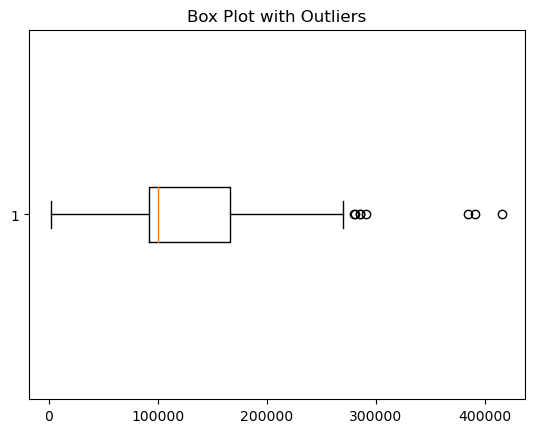

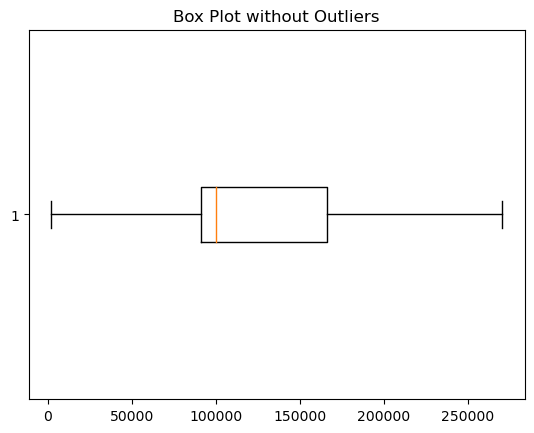

In [18]:
outlierConstant=1.5
x=df['Salary_New_Processed']

def removeOutliers(x, outlierConstant):
    upper_quartile = np.percentile(x, 75)
    lower_quartile = np.percentile(x, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = [lower_quartile - IQR, upper_quartile + IQR]
    resultList = []
    for y in x:
        if y >= quartileSet[0] and y <=quartileSet[1]:
            resultList.append(y)
    return resultList
    
removeOutliers(x, outlierConstant)


fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot with Outliers')
ax1.boxplot(x,vert=False)

new=removeOutliers(x, 1.5)
fig2, ax2 = plt.subplots()
ax2.set_title('Box Plot without Outliers')
ax2.boxplot(new,vert=False)

# If you do not want to show outliers, you can try the following:
# ax2.boxplot(new,vert=False,showfliers=False)  
plt.show()


In [19]:
#what is the count of jobs available based on Type
jobs_title_type=pd.crosstab(df.JobTitle_New,df.Type)
jobs_title_type

Type,Full-time,Internship,Part-time
JobTitle_New,,,
Business Analyst,220,3,38
Business Intelligence Analyst,38,1,3
Data Analyst,287,2,71
Data Engineer,109,5,27
Data Scientist,162,3,25


Text(0, 0.5, 'Job Title')

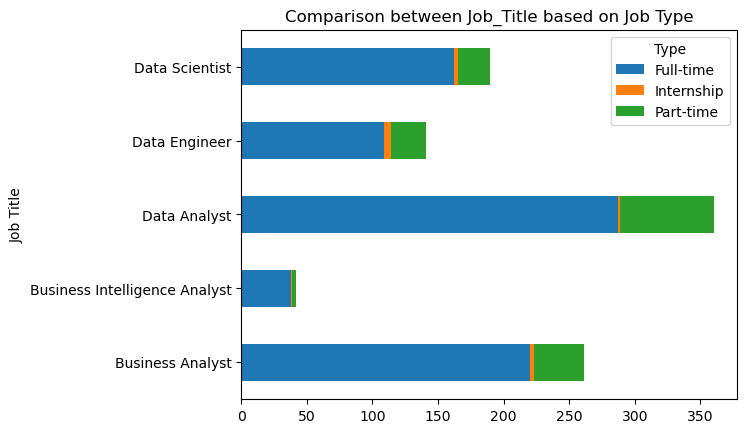

In [20]:
jobs_title_type.plot.barh(stacked=True)
plt.title("Comparison between Job_Title based on Job Type")
plt.ylabel("Job Title")

In [21]:
df['JobTitle_New'].unique()

array(['Data Analyst', 'Data Engineer', 'Business Intelligence Analyst',
       'Business Analyst', 'Data Scientist'], dtype=object)

In [22]:
df['JobTitle_New'].value_counts()

JobTitle_New
Data Analyst                     363
Business Analyst                 263
Data Scientist                   190
Data Engineer                    141
Business Intelligence Analyst     42
Name: count, dtype: int64

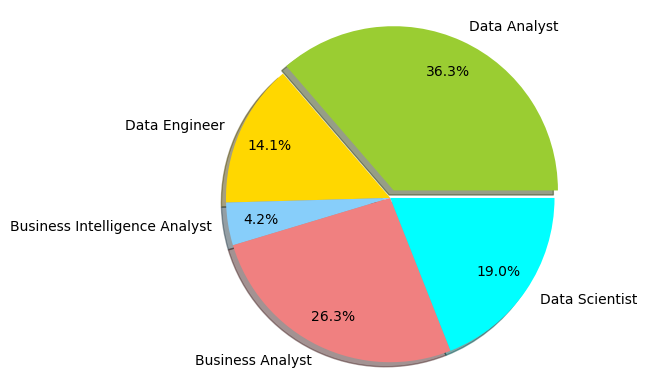

In [23]:
#variation in job_titles with pie chart
job_title = 'Data Analyst', 'Data Engineer', 'Business Intelligence Analyst', 'Business Analyst','Data Scientist'
sizes = [363, 141, 42,263,190]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan']
explode = (0.05, 0, 0, 0,0) 

fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=job_title ,colors=colors,autopct='%.1f%%',pctdistance = 0.8,
        shadow=True, startangle=0,frame = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

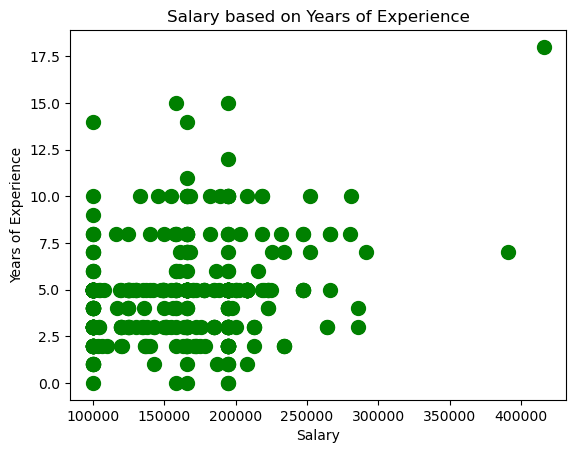

In [24]:
N = 50
x = new_df['Salary_New_Processed']
y = new_df['Years of Experience Required']

#area = (30 * np.random.rand(N))**2  # marker size in units of point **2. 

plt.scatter(x, y, s=100, c='g', alpha=1) 
plt.title("Salary based on Years of Experience")
plt.xlabel("Salary")
plt.ylabel("Years of Experience")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x=df['Years of Experience Required'],y=df['Salary_New_Processed'],data=df)
plt.title('Salary based on Years of Experience')

In [ ]:
 defined_skills = df['Skills'].str.split(',\s*', expand=True).stack()

In [ ]:
defined_skills_counts =defined_skills.value_counts()

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'JobTitle_New' is the column
# Count the occurrences of each unique job title
defined_skills_counts = defined_skills_counts.sort_values(ascending=True)
# Plot the value counts as a bar chart
plt.figure(figsize=(10,6))
plt.barh(defined_skills_counts.index, defined_skills_counts.values)

# Labeling the chart
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.title('Skills Frequency Distribution')

# Show the plot
plt.show()